In [199]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import _nnpack_available
import torch.nn as nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [200]:
training_data = datasets.FashionMNIST(
    root = 'data', train = True, download = True, transform = ToTensor()
)

In [201]:
test_data = datasets.FashionMNIST(
    root = 'data', train=False, download=True, transform=ToTensor()
)

In [202]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [203]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [204]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [205]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [206]:
train_features, train_labels = next(iter(train_dataloader))

In [207]:
train_features.size()

torch.Size([64, 1, 28, 28])

In [208]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

label=9


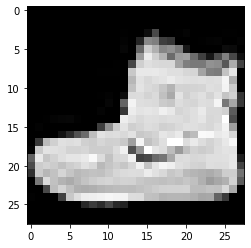

In [209]:
img, label = training_data[0]
print(f'label={label}')
plt.imshow(img.squeeze(), cmap='gray')

In [210]:
labels_map = {0:'ts', 1:'tr', 2:'pu', 3:'dr', 4:'co', 5:'sa', 6:'sh', 7:'sn', 8:'ba', 9:'an'}

pu
co
co
tr
sa
tr
sa
an
dr
an


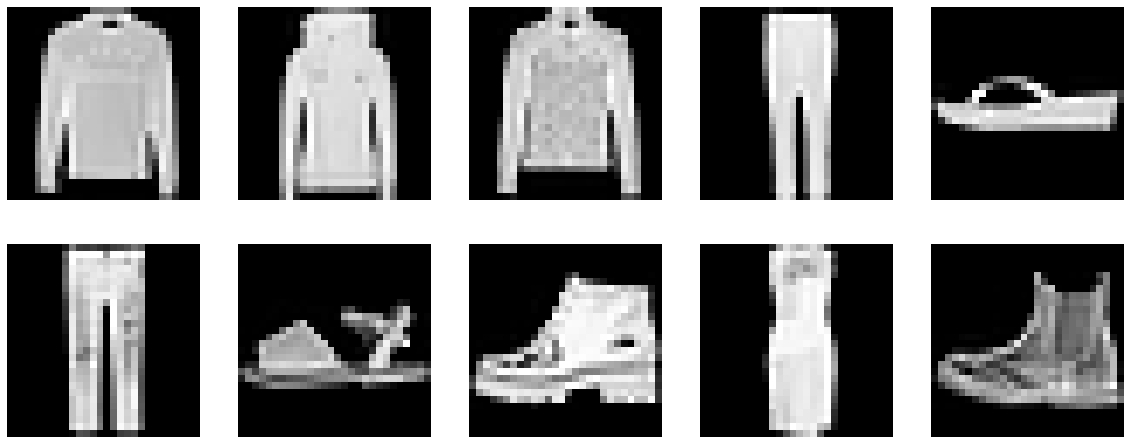

In [211]:
figure = plt.figure(figsize=(20,8))
cols, rows = 5, 2

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    print(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')

In [214]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        output = self.classifier(x)
        return output

In [215]:
model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [267]:
X = torch.rand(1, 28, 28, device=device)
output = model(X)
print(f'model: {output}\n')

pred_probab = nn.Softmax(dim=1)(output)
print(f'softmax: {pred_probab}\n')

y_pred = pred_probab.argmax()
print(f'pred: {y_pred}')

model: tensor([[-0.0373, -0.1289,  0.4235, -0.0471, -0.2305, -0.1079, -0.0857, -0.2777,
          0.0534, -0.2959]], grad_fn=<AddmmBackward0>)

softmax: tensor([[0.1015, 0.0926, 0.1609, 0.1005, 0.0837, 0.0946, 0.0967, 0.0798, 0.1112,
         0.0784]], grad_fn=<SoftmaxBackward0>)

pred: 2


In [270]:
loss = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [272]:
for batch, (X, y) in enumerate(train_loader):

NameError: name 'train_loader' is not defined